In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV , StratifiedKFold
from sklearn.metrics import r2_score , accuracy_score , confusion_matrix , classification_report
from sklearn.svm import SVR

In [2]:
df = pd.read_csv("diamonds.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df = df.drop("Unnamed: 0",axis=1)

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
df[df["x"] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


In [9]:
df = df.drop(df[df["x"] == 0].index)

In [10]:
df.describe()

,carat,depth,table,price,x,y,z
count,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,0.797879,61.749336,57.457029,3932.136079,5.732007,5.735254,3.539259
std,0.473986,1.432514,2.234064,3988.734835,1.119670,1.140343,0.704434
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,0.000000
25%,0.400000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
df = df.drop(df[df["z"] == 0].index)

In [12]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


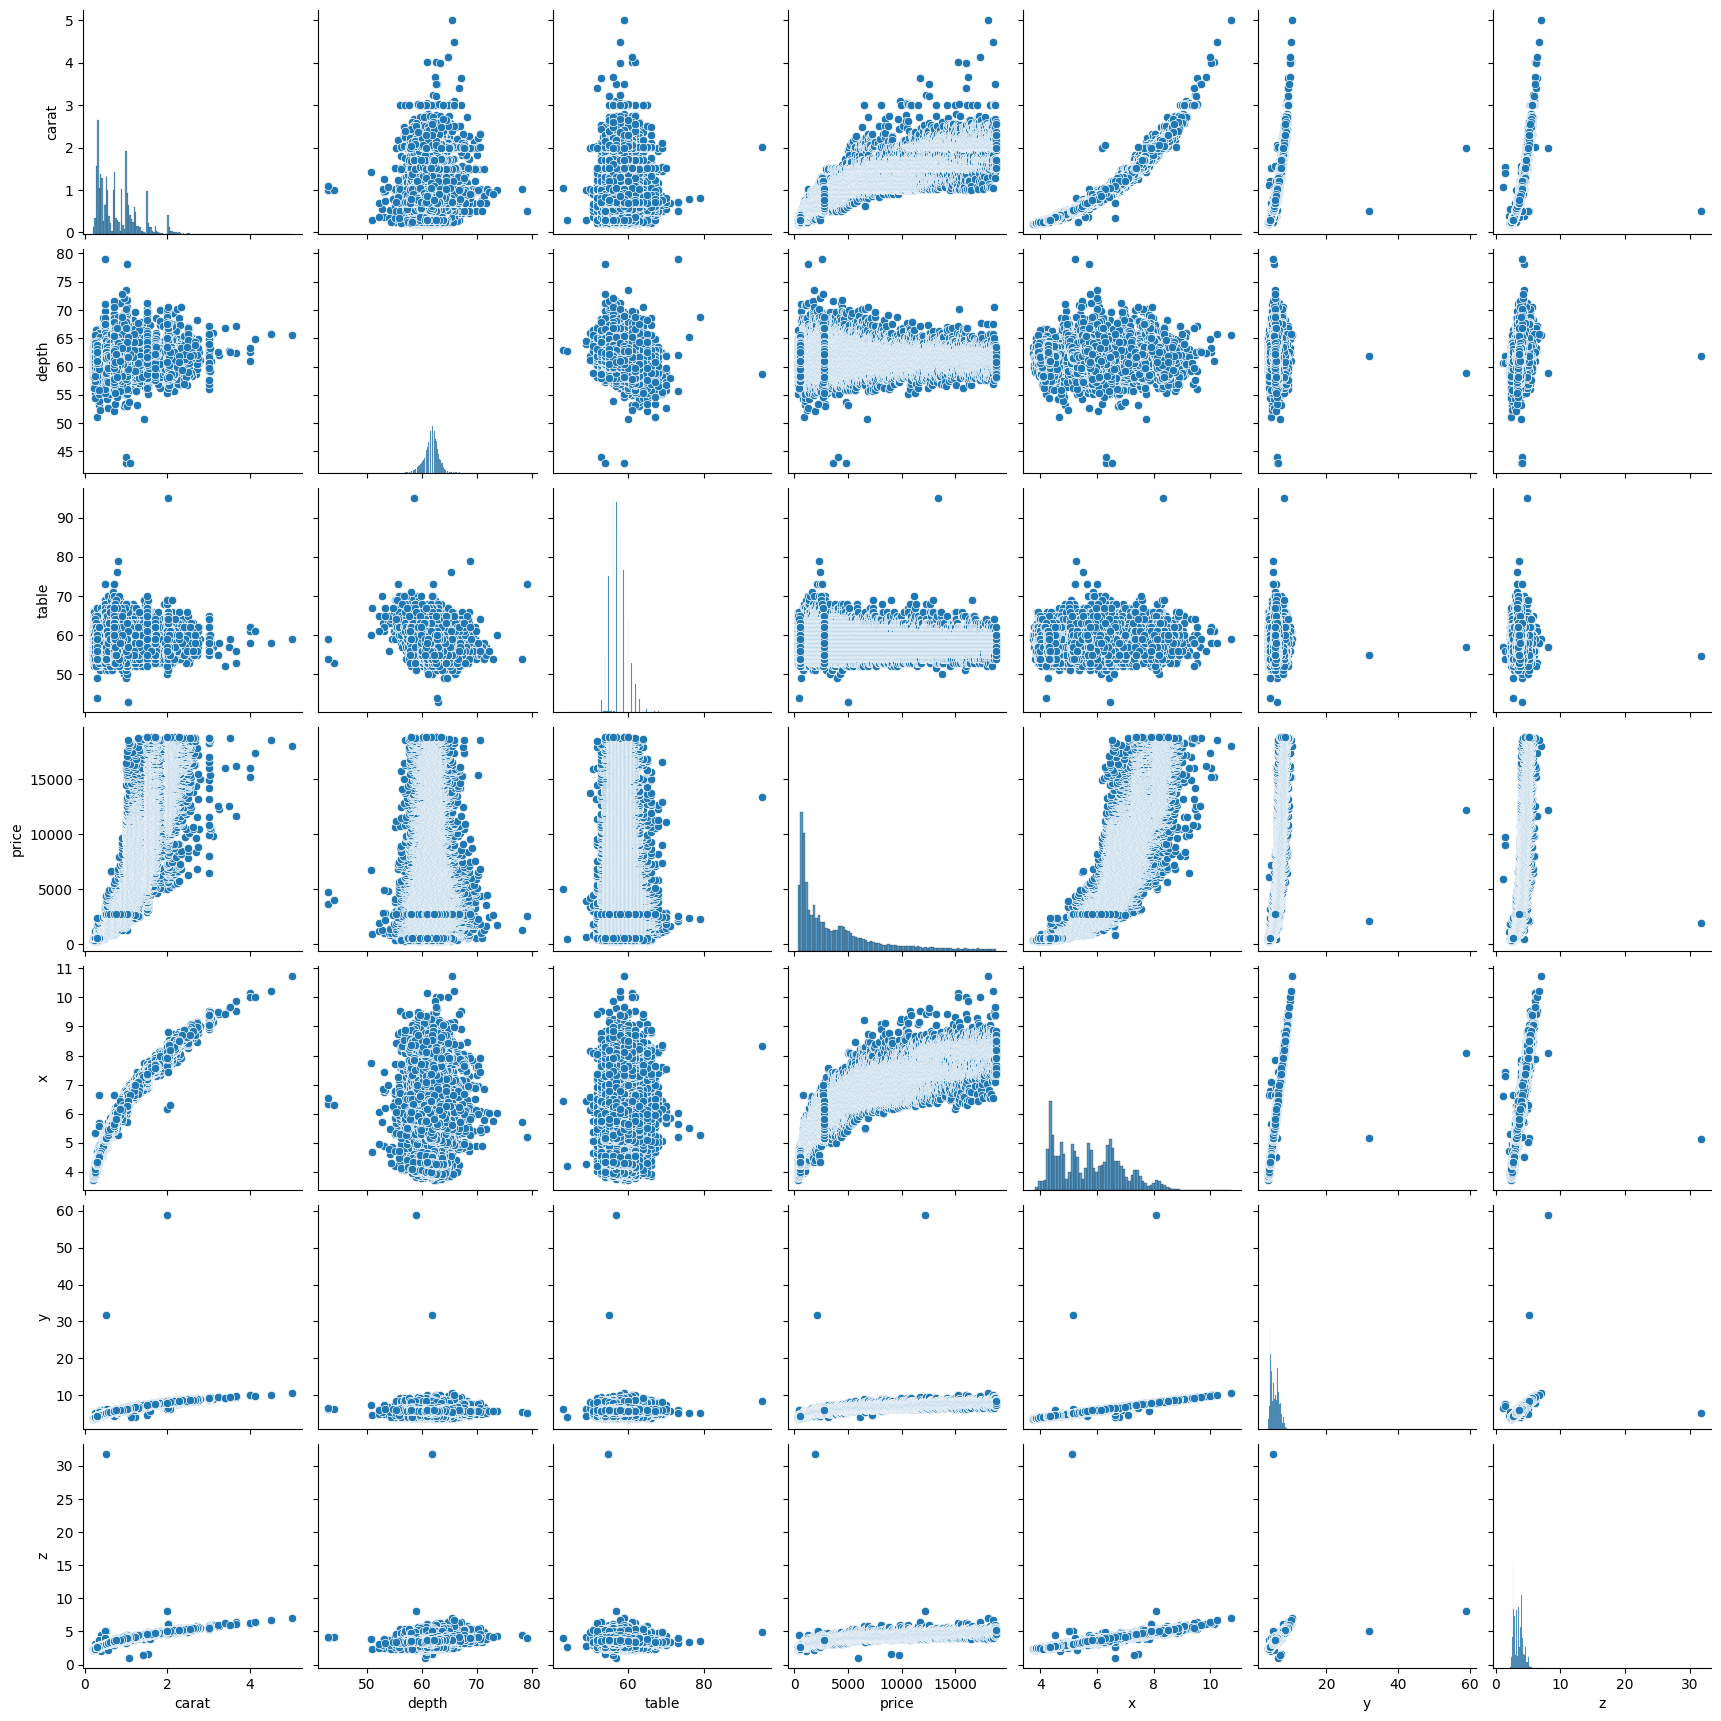

In [13]:
sns.pairplot(df)
plt.show()

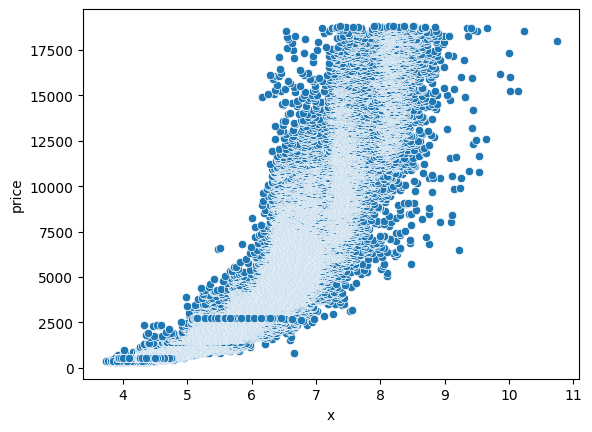

In [14]:
sns.scatterplot(x=df["x"] , y=df["price"])
plt.show()

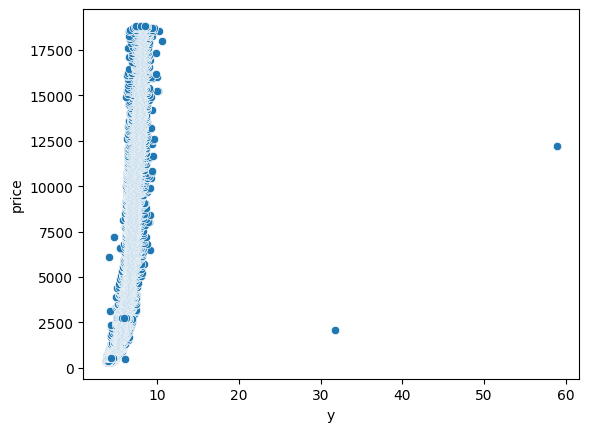

In [15]:
sns.scatterplot(x=df["y"] , y=df["price"])
plt.show()

In [18]:
df.shape

(53920, 10)

In [19]:
df = df[df["y"] < 25]

In [20]:
df.shape

(53918, 10)

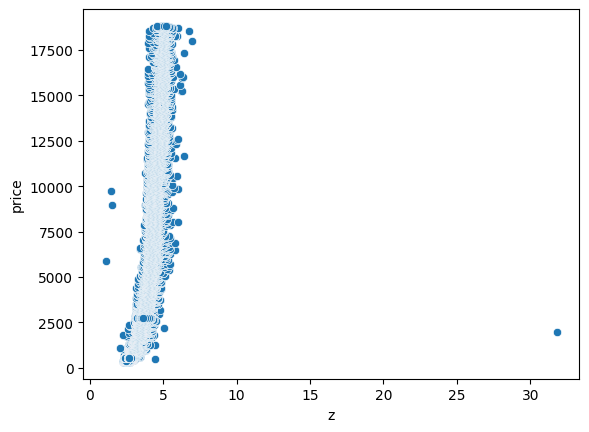

In [21]:
sns.scatterplot(x=df["z"] , y=df["price"])
plt.show()

In [22]:
df = df[df["z"] < 20]

In [23]:
df.shape

(53917, 10)

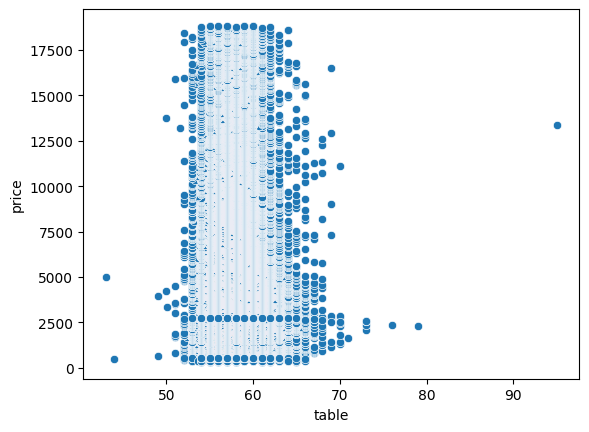

In [25]:
sns.scatterplot(x = df["table"] ,  y = df["price"])
plt.show()

In [26]:
df = df[df["table"] < 75]

In [27]:
df.shape

(53914, 10)

In [28]:
df = df[df["table"] > 30]

In [29]:
df.shape

(53914, 10)

In [30]:
df = df[df["table"] > 35]

In [31]:
df.shape

(53914, 10)

In [32]:
df = df[df["table"] > 40]

In [33]:
df.shape

(53914, 10)

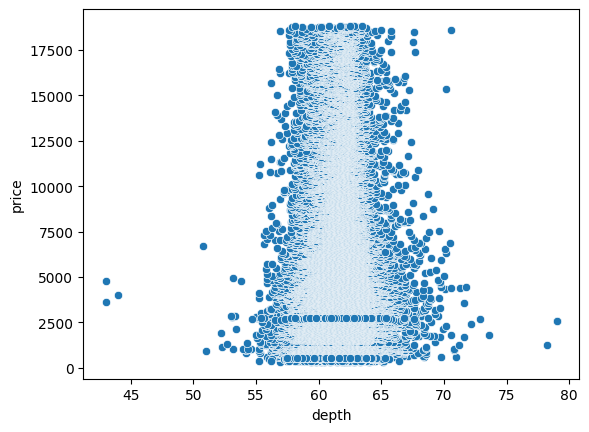

In [34]:
sns.scatterplot(x=df["depth"] , y=df["price"])
plt.show()

In [35]:
df = df[df["depth"] > 50]

In [36]:
df.shape

(53911, 10)

In [37]:
df = df[df["depth"] < 75]

In [38]:
df.shape

(53908, 10)

In [39]:
df.describe()

,carat,depth,table,price,x,y,z
count,53908.000000,53908.000000,53908.000000,53908.000000,53908.000000,53908.000000,53908.000000
mean,0.797658,61.749507,57.455105,3930.881984,5.731553,5.733390,3.539321
std,0.473780,1.419715,2.222823,3987.300959,1.119422,1.111288,0.691623
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,73.000000,18823.000000,10.740000,10.540000,6.980000


In [40]:
model = SVR()

In [41]:
X = df.drop("price" , axis=1)

In [42]:
y = df["price"]

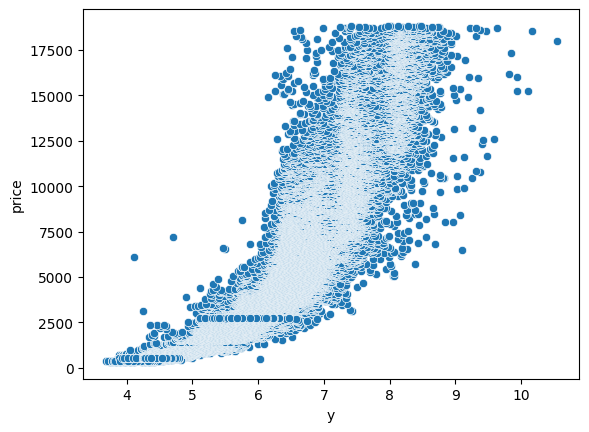

In [43]:
sns.scatterplot(x=df["y"] , y=df["price"])
plt.show()

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
label_encoder = LabelEncoder()

In [48]:
X_train["cut"] = label_encoder.fit_transform(X_train["cut"])
X_test["cut"] = label_encoder.transform(X_test["cut"])

In [49]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [50]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
41066,0.52,2,F,SI2,62.1,55.0,5.14,5.17,3.20
2012,0.78,3,D,SI1,61.8,59.0,5.93,5.88,3.65
23552,1.70,4,H,SI1,63.6,59.0,7.46,7.55,4.77
7231,1.01,4,J,SI1,63.0,54.0,6.35,6.41,4.02
46593,0.54,2,F,VS2,60.3,55.0,5.32,5.26,3.19
...,...,...,...,...,...,...,...,...,...
11293,1.00,4,H,VS2,60.7,60.0,6.55,6.49,3.96
44755,0.52,3,D,VS2,60.9,58.0,5.22,5.16,3.16
38180,0.41,2,D,SI1,60.8,57.0,4.84,4.80,2.93
860,0.90,3,J,SI1,62.8,59.0,6.13,6.03,3.82


In [51]:
X_train["color"] = label_encoder.fit_transform(X_train["color"])
X_test["color"] = label_encoder.transform(X_test["color"])

In [52]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
41066,0.52,2,2,SI2,62.1,55.0,5.14,5.17,3.20
2012,0.78,3,0,SI1,61.8,59.0,5.93,5.88,3.65
23552,1.70,4,4,SI1,63.6,59.0,7.46,7.55,4.77
7231,1.01,4,6,SI1,63.0,54.0,6.35,6.41,4.02
46593,0.54,2,2,VS2,60.3,55.0,5.32,5.26,3.19
...,...,...,...,...,...,...,...,...,...
11293,1.00,4,4,VS2,60.7,60.0,6.55,6.49,3.96
44755,0.52,3,0,VS2,60.9,58.0,5.22,5.16,3.16
38180,0.41,2,0,SI1,60.8,57.0,4.84,4.80,2.93
860,0.90,3,6,SI1,62.8,59.0,6.13,6.03,3.82


In [53]:
X_train["clarity"] = label_encoder.fit_transform(X_train["clarity"])
X_test["clarity"] = label_encoder.transform(X_test["clarity"])

In [54]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
41066,0.52,2,2,3,62.1,55.0,5.14,5.17,3.20
2012,0.78,3,0,2,61.8,59.0,5.93,5.88,3.65
23552,1.70,4,4,2,63.6,59.0,7.46,7.55,4.77
7231,1.01,4,6,2,63.0,54.0,6.35,6.41,4.02
46593,0.54,2,2,5,60.3,55.0,5.32,5.26,3.19
...,...,...,...,...,...,...,...,...,...
11293,1.00,4,4,5,60.7,60.0,6.55,6.49,3.96
44755,0.52,3,0,5,60.9,58.0,5.22,5.16,3.16
38180,0.41,2,0,2,60.8,57.0,4.84,4.80,2.93
860,0.90,3,6,2,62.8,59.0,6.13,6.03,3.82


In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

In [58]:
X_train_scaled = scaler.fit_transform(X_train)

In [59]:
X_test_scaled = scaler.transform(X_test)

In [60]:
param_grid = {
    "C" : [1,10,100],
    "gamma" : [1,0.1,0.01],
    "kernel" : ["rbf","linear"]
}

In [68]:
grid = GridSearchCV(estimator=model , param_grid=param_grid , scoring="r2",n_jobs=-1 , verbose= 3)

In [69]:
grid.fit(X_train_scaled , y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",SVR()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [1, 10, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf', 'linear']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'r2'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",None
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fol

In [70]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [71]:
y_pred = grid.predict(X_test_scaled)

In [72]:
print(f"Modelin doğruluk değeri : {r2_score(y_test,y_pred)}")

Modelin doğruluk değeri : 0.9313489892901768
